In [1]:
import random
import math
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np

Para este ejercicio usaremos el método de Aceptación - Rechazo

In [5]:
media = 15 # dato del enunciado
desvio = 2 # dato del enunciado
muestras = 100_000 # dato del enunciado
c = 1.3 # es fx/fy que maximiza el cociente

In [9]:
resultados = []

def cociente(t):
    # es la division de fx/c*fy
    return (1 / math.sqrt(2 * math.pi)) * math.exp(t - (t**2 / 2)) * 1/c

for i in range(muestras):
    t = random.expovariate(1) # muestra exponencial de media 1
    u = random.random()
    if u < cociente(t):
        u2 = random.random()
        if u2 < 0.5:
            resultados.append(t)
        else:
            resultados.append(-t)

In [19]:
# aplicamos transformacion de Normal std a lo pedido
transformada = [r*desvio + media for r in resultados]

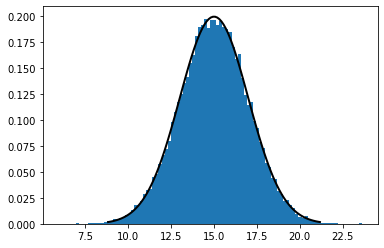

In [20]:
# creo la normal real para plotear la curva y comparar
x_real = np.linspace(norm.ppf(0.001, media, desvio), norm.ppf(0.999, media, desvio), 100)
fig, ax = plt.subplots(1, 1)

y_real = norm(media, desvio)
ax.plot(x_real, y_real.pdf(x_real), 'k-', lw = 2)

ax.hist(transformada, 100, density=True)
plt.show()

In [24]:
print(f'Esperanza simulada: {np.mean(transformada)} - Varianza simulada: {np.var(transformada)}')
print(f'Esperanza real: {media} - Varianza real: {desvio**2}')


Esperanza simulada: 14.993968403809198 - Varianza simulada: 4.056795975857348
Esperanza real: 15 - Varianza real: 4
